/home/raph/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

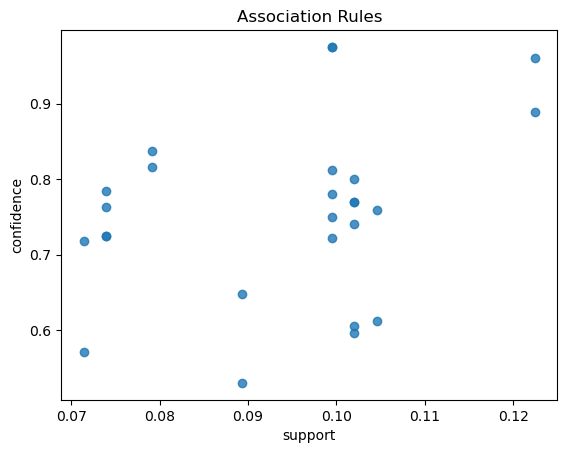

In [63]:

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#### ---- ---- START FUNCTIONS ---- ---- ####

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)    
    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
    
    for a in rules.iloc[i]['antecedents']:               
        G1.add_nodes_from([a])
        G1.add_edge(a, "R"+str(i), color = colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge(c, "R"+str(i), color = colors[i],  weight = 2)
 
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
   
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k = 16, scale = 1)
    #nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  
        pos[p][1] += 0.07
        
    nx.draw_networkx_labels(G1, pos)
    
    plt.show()
    
#### ---- ---- END FUNCTIONS ---- ---- ####


#### ---- ---- START SCRIPT ---- ---- ####

df = pd.read_excel('./online_retail.xlsx')

#print(df)

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
 
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

#print(basket)

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)
 
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

support = rules[["support"]]
confidence = rules[["confidence"]]

plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns.regplot(x=support, y=confidence, fit_reg=False)
 
# draw_graph(rules, 10) 

#### ---- ---- END SCRIPT ---- ---- ####
